Gradient : (1 - y_true)/(1 - p) - y_true/p
Hessienne : (1 - y_true)/(1 - p)**2 + y_true/p**2
Entropie croisée binaire est convexe pour p dans (0,1)


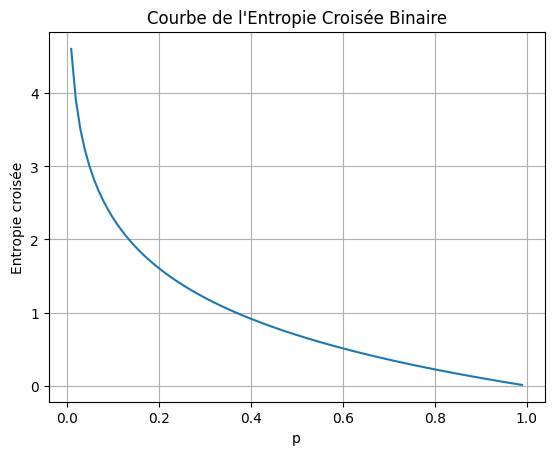

Equation de la tangente : x*(x - 1)/2 + 2*y*(y - 0.5)


In [8]:
#  Import des bibliothèques
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#  Jeu de données : classification
df_iris = pd.read_csv("./data/iris/iris.data", header=None,
                    names=['sepal_length','sepal_width','petal_length','petal_width','class'])
X = df_iris[['sepal_length','sepal_width']].head(50)
y = (df_iris['class'].head(50) == 'Iris-setosa').astype(int)  # 0/1

# Gradient et Hessienne Entropie Croisée Binaire
p, y_true = sp.symbols('p y_true')
L = - (y_true*sp.log(p) + (1-y_true)*sp.log(1-p))
grad = sp.diff(L, p)
hess = sp.diff(grad, p)
print("Gradient :", grad)
print("Hessienne :", hess)

#  Convexité
# Hessienne positive pour 0<p<1 => convexe
print("Entropie croisée binaire est convexe pour p dans (0,1)")

# Courbe de l'entropie croisée binaire
y_val = 1  # exemple
L_func = sp.lambdify(p, L.subs(y_true, y_val), 'numpy')
p_vals = np.linspace(0.01,0.99,100)
plt.plot(p_vals, L_func(p_vals))
plt.xlabel('p')
plt.ylabel('Entropie croisée')
plt.title('Courbe de l\'Entropie Croisée Binaire')
plt.grid(True)
plt.show()

# Tangente à une ellipse
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5
ellipse = x**2/a**2 + y**2/b**2 - 1
grad_ellipse = [sp.diff(ellipse, var) for var in (x,y)]
tangent_eq = grad_ellipse[0]*(x - x0_val) + grad_ellipse[1]*(y - y0_val)
print("Equation de la tangente :", tangent_eq)


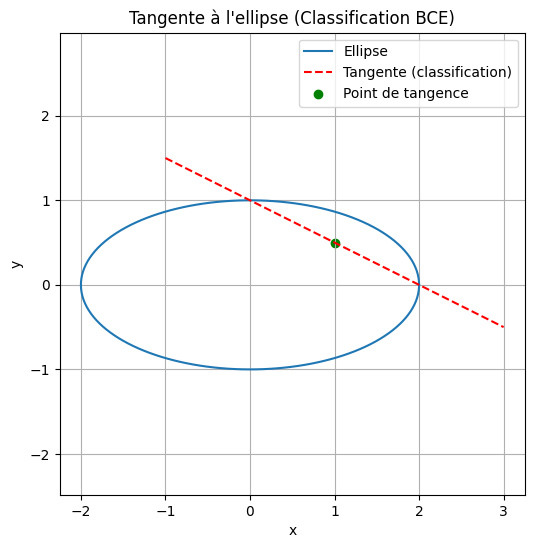

In [9]:

# Paramètres de l'ellipse
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5

# Equation de la tangente sous forme y = f(x)
slope = -grad_ellipse[0].subs({x:x0_val, y:y0_val}) / grad_ellipse[1].subs({x:x0_val, y:y0_val})
intercept = y0_val - slope*x0_val
def tangent_func(x_val):
    return slope*x_val + intercept

# Tracé
theta = np.linspace(0, 2*np.pi, 300)
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)

x_tangent = np.linspace(x0_val-2, x0_val+2, 100)
y_tangent = tangent_func(x_tangent)

plt.figure(figsize=(6,6))
plt.plot(x_ellipse, y_ellipse, label='Ellipse')
plt.plot(x_tangent, y_tangent, 'r--', label='Tangente (classification)')
plt.scatter([x0_val], [y0_val], color='green', label='Point de tangence')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangente à l\'ellipse (Classification BCE)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


Gradient : 2*y_pred - 2*y_true
Hessienne : 2
MSE est convexe car Hessienne > 0


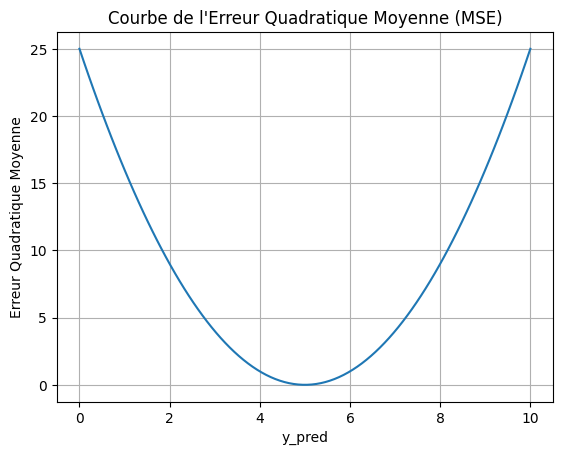

Equation de la tangente : x*(x - 1)/2 + 2*y*(y - 0.5)


In [5]:
#  Jeu de données : régression
df_wine = pd.read_csv("./data/wine+quality/winequality-red.csv", sep=';')
X = df_wine[['fixed acidity','volatile acidity']].head(50)
y = df_wine['quality'].head(50)

# Gradient et Hessienne Erreur Quadratique Moyenne (MSE)
y_pred, y_true = sp.symbols('y_pred y_true')
L = (y_pred - y_true)**2
grad = sp.diff(L, y_pred)
hess = sp.diff(grad, y_pred)
print("Gradient :", grad)
print("Hessienne :", hess)

# Convexité
# Hessienne > 0 => fonction convexe
print("MSE est convexe car Hessienne > 0")

# Courbe de MSE
y_true_val = 5  # exemple de valeur réelle
L_func = sp.lambdify(y_pred, L.subs(y_true, y_true_val), 'numpy')
y_pred_vals = np.linspace(y_true_val-5, y_true_val+5, 100)
plt.plot(y_pred_vals, L_func(y_pred_vals))
plt.xlabel('y_pred')
plt.ylabel('Erreur Quadratique Moyenne')
plt.title('Courbe de l\'Erreur Quadratique Moyenne (MSE)')
plt.grid(True)
plt.show()

# Tangente à une ellipse
x, y = sp.symbols('x y')
a, b = 2, 1
x0_val, y0_val = 1, 0.5
ellipse = x**2/a**2 + y**2/b**2 - 1
grad_ellipse = [sp.diff(ellipse, var) for var in (x,y)]
tangent_eq = grad_ellipse[0]*(x - x0_val) + grad_ellipse[1]*(y - y0_val)
print("Equation de la tangente :", tangent_eq)


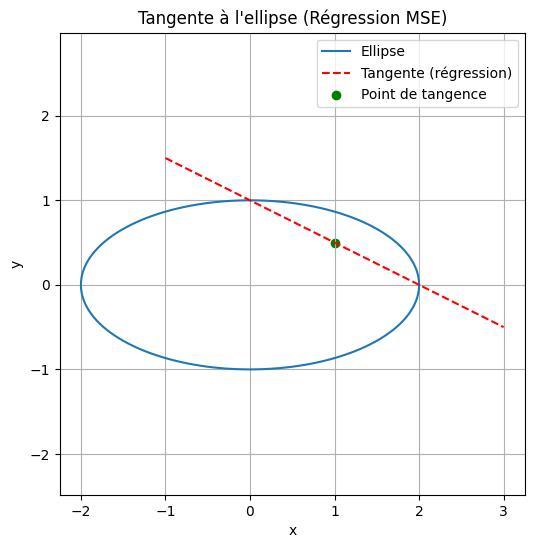

In [11]:

# Equation de la tangente sous forme y = f(x)
slope = -grad_ellipse[0].subs({x:x0_val, y:y0_val}) / grad_ellipse[1].subs({x:x0_val, y:y0_val})
intercept = y0_val - slope*x0_val
def tangent_func(x_val):
    return slope*x_val + intercept

# Tracé
theta = np.linspace(0, 2*np.pi, 300)
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)

x_tangent = np.linspace(x0_val-2, x0_val+2, 100)
y_tangent = tangent_func(x_tangent)

plt.figure(figsize=(6,6))
plt.plot(x_ellipse, y_ellipse, label='Ellipse')
plt.plot(x_tangent, y_tangent, 'r--', label='Tangente (régression)')
plt.scatter([x0_val], [y0_val], color='green', label='Point de tangence')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangente à l\'ellipse (Régression MSE)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
